##### Imports

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import shap

##### Reading in the Data

In [2]:
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

##### Viewing the data

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Column Names that has numerical values

In [4]:
numerical_data_column_names = train_data.describe().columns
df = train_data[numerical_data_column_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

### Data Cleaning and Preparation

##### Filling in the null values

* As we can see from the information above we saw there were 3 columns that had null values

In [5]:
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode()[0],inplace=True)
train_data["MasVnrArea"].fillna(0,inplace=True)
train_data["GarageYrBlt"].fillna(train_data["YearBuilt"],inplace=True)

##### Re-check of the null values...ensuring that they were filled in

In [6]:
train_data[numerical_data_column_names].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1460 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

__Encoding the string values (objects)__

* Encode categorical data labels with value between 0 and n_classes-1 with respect to the column
* While we are at this step we might as well replace the NaN values in the data...We do it for both test and train data

In [7]:
categorical_data_column_names = set(train_data.columns) - set(train_data.describe().columns)
for name in categorical_data_column_names:
    le = preprocessing.LabelEncoder()
    x = train_data[name].values
    le.fit(x)
    train_data[name] = le.transform(x)
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000


In [8]:
for col in train_data.columns:
    if train_data[col].dtype == "O":
        train_data[col] = train_data[col].replace(np.nan,"None")
        le = LabelEncoder()
        train_data[col] = le.fit_transform(train_data[col])

for col in test_data.columns:
    if test_data[col].dtype == "O":
        test_data[col] = test_data[col].replace(np.nan,"None")
        le = LabelEncoder()
        test_data[col] = le.fit_transform(test_data[col])

# categorical_data_column_names = set(train_data.columns) - set(train_data.describe().columns)
# for name in categorical_data_column_names:
#     le = preprocessing.LabelEncoder()
#     x = train_data[name].values
#     le.fit(x)
#     train_data[name] = le.transform(x)
# train_data.head()

__Checkpoint__

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int32  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [10]:
train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,3.028767,68.267123,10516.828082,0.995890,1.903425,1.942466,2.777397,0.000685,...,2.758904,2.991096,3.504795,3.922603,43.489041,6.321918,2007.815753,7.513014,3.770548,180921.195890
std,421.610009,42.300571,0.632017,22.356355,9981.264932,0.063996,0.394776,1.409156,0.707666,0.026171,...,40.177307,0.140703,1.082912,0.404103,496.123024,2.703626,1.328095,1.552100,1.100854,79442.502883
min,1.000000,20.000000,0.000000,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,34900.000000
25%,365.750000,20.000000,3.000000,60.000000,7553.500000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,129975.000000
50%,730.500000,50.000000,3.000000,63.000000,9478.500000,1.000000,2.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,163000.000000
75%,1095.250000,70.000000,3.000000,79.000000,11601.500000,1.000000,2.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,214000.000000
max,1460.000000,190.000000,4.000000,313.000000,215245.000000,1.000000,2.000000,3.000000,3.000000,1.000000,...,738.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,755000.000000


### Handling Outliers (IQR)
* Interquartile Range (IQR) was used to identifying outliers. A “fence” is placed outside of Q1 and Q3. Any values that fall outside of this fence are considered outliers.
* There was one outlier that did not make sense which was the LotArea that had a square footage of 215245.000000 square feet which is massive

In [11]:
upper_lim = train_data['LotArea'].quantile(.95)
lower_lim = train_data['LotArea'].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data
train_data[(train_data['LotArea'] < upper_lim) & (train_data['LotArea'] > lower_lim)]
Q1 = train_data['LotArea'].quantile(0.25)
Q3 = train_data['LotArea'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)
train_data = train_data[(train_data['LotArea'] < (Q3 + 1.5 * IQR)) & (train_data['LotArea'] > (Q1 - 1.5 * IQR))]
print(train_data.shape)

7553.5 11601.5 4048.0
(1391, 81)


I want to make sure that the SalePrice (Target Value) is saved prior to the feature selection stage and as well as the original dataframe so I can choose which features I want to engineer

In [12]:
sp = pd.DataFrame(train_data["SalePrice"])
train_data_df = pd.read_csv("data/train.csv")

### Feature Selection

__Spearman Method (Statistical)__
* The Spearman correlation between two variables is equal to the Pearson correlation between the rank values of those two variables; while Pearson's correlation assesses linear relationships, Spearman's correlation assesses monotonic relationships (whether linear or not).

<AxesSubplot:>

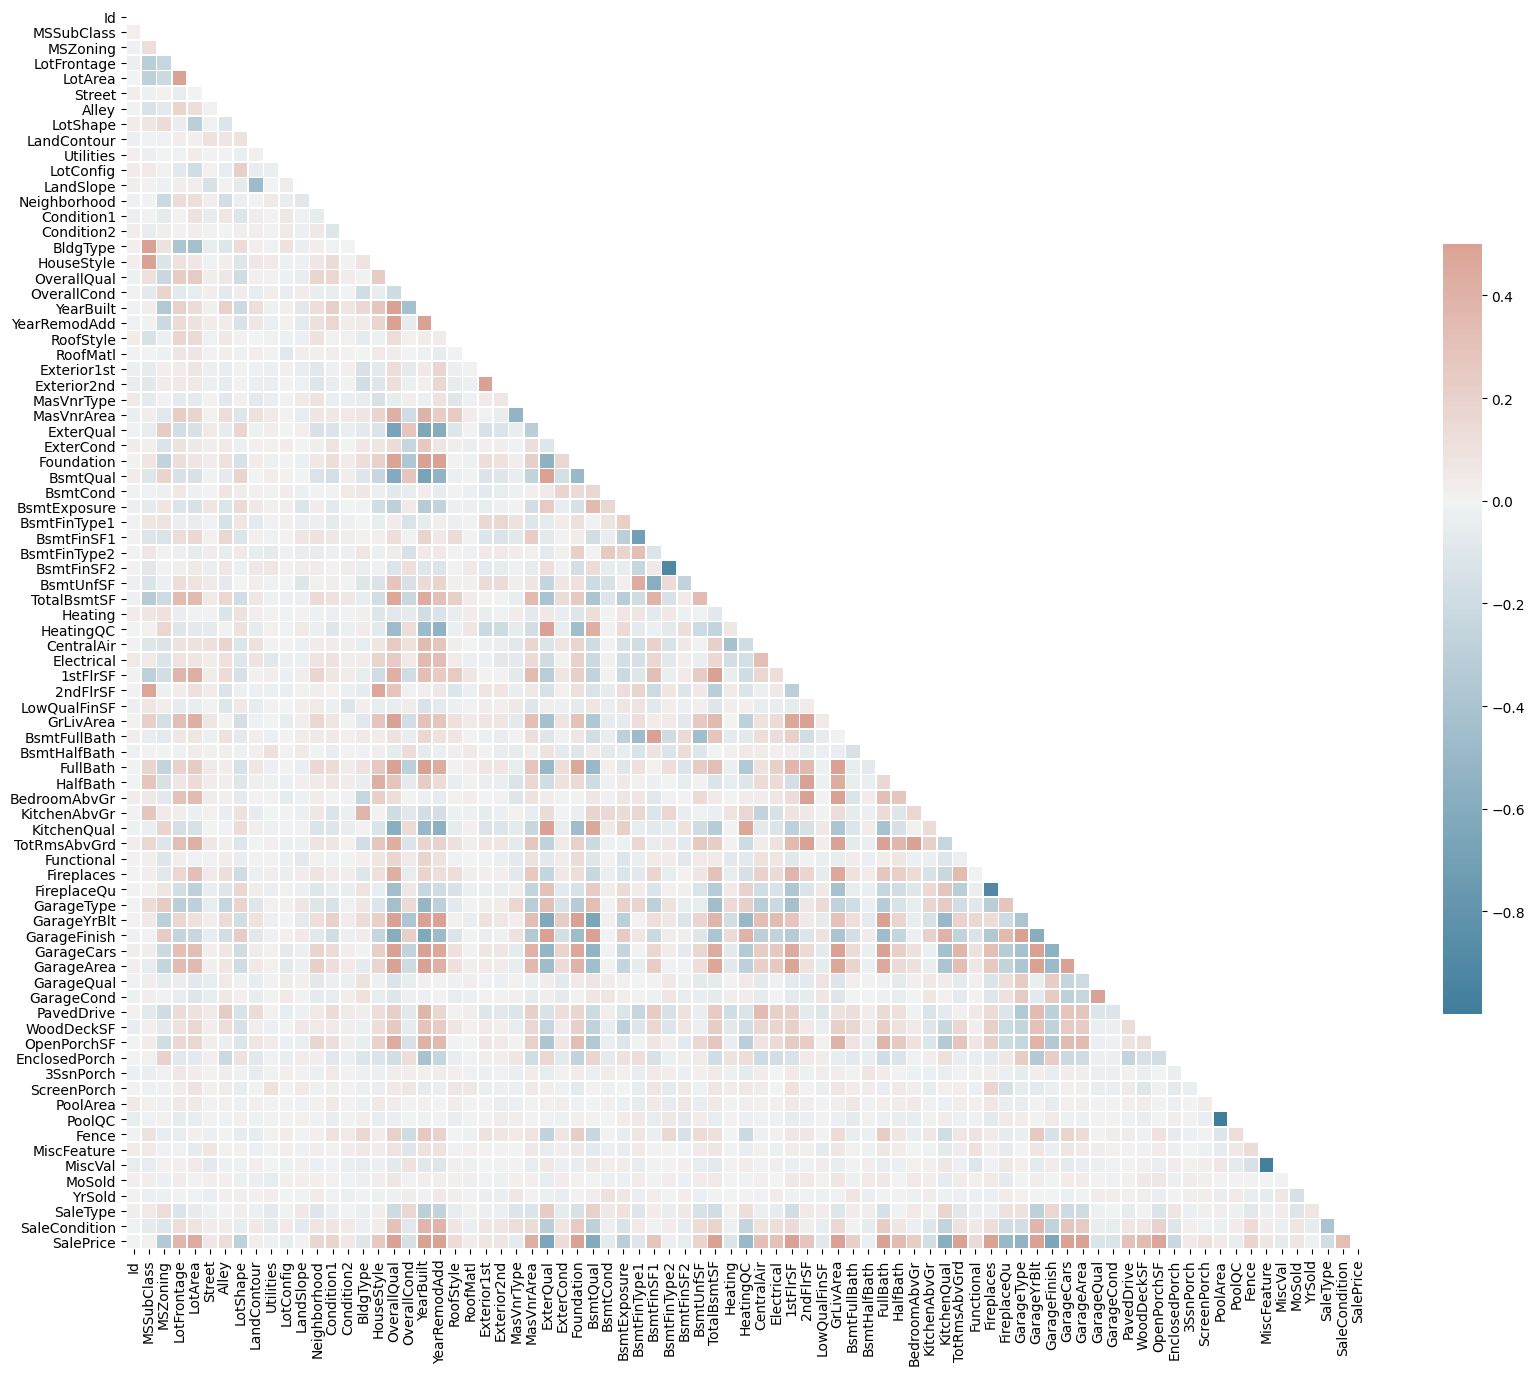

In [13]:
correlation_matrix = train_data.corr(method='spearman')
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.5, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

__Spearman Model best features__

In [14]:
indecies = np.where(correlation_matrix['SalePrice'] > 0.3)
improved_features = correlation_matrix.iloc[indecies].drop('SalePrice')
improved_features['SalePrice']
new_features_spearman = list(improved_features.index)
np.array(new_features_spearman)

array(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'Foundation', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SaleCondition'],
      dtype='<U13')

__Selecting features based on Statistics (Scoring Function)__

Linear model for testing the individual effect of each of many regressors. This is a scoring function to be used in a feature selection procedure.
1. The correlation between each regressor and the target is computed
2. It is converted to an F-score then to a p-value.

In [15]:
X = train_data.drop(["Id","SalePrice"],axis=1)
y = train_data["SalePrice"]

#Select the top features in the dataset
feature_selector = SelectKBest(f_regression,k=20)
feature_selector.fit(X, y)

f_scores = pd.DataFrame(list(zip(X.columns, feature_selector.scores_, feature_selector.pvalues_)),
                           columns=['ftr', 'score', 'pval']).dropna(axis=0)
f_scores = pd.DataFrame(f_scores)
f_scores.head()

,ftr,score,pval
0,MSSubClass,10.247615,1.399598e-03
1,MSZoning,50.718016,1.705808e-12
2,LotFrontage,241.217868,2.790973e-50
3,LotArea,315.881102,7.769502e-64
4,Street,3.638880,5.665096e-02


__Scoring Function best features__

In [16]:
kbest = np.asarray(X.columns)[feature_selector.get_support()]
kbest

array(['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea'], dtype=object)

__Selecting features based Random Forest Feature Importance__
* The impurity-based feature importances.

* The higher, the more important the feature. The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the _Gini Importance_.

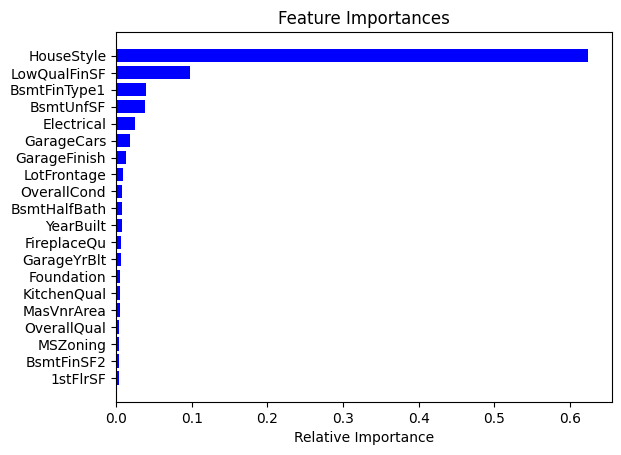

In [17]:
x = train_data.drop(["Id","SalePrice"],axis=1).values
y = train_data["SalePrice"]
model = RandomForestRegressor(n_estimators=100)
model.fit(x,y)
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-20:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

__Random Forest best features__

In [18]:
random_for_ftr = [features[i] for i in indices]
np.array(random_for_ftr)

array(['1stFlrSF', 'BsmtFinSF2', 'MSZoning', 'OverallQual', 'MasVnrArea',
       'KitchenQual', 'Foundation', 'GarageYrBlt', 'FireplaceQu',
       'YearBuilt', 'BsmtHalfBath', 'OverallCond', 'LotFrontage',
       'GarageFinish', 'GarageCars', 'Electrical', 'BsmtUnfSF',
       'BsmtFinType1', 'LowQualFinSF', 'HouseStyle'], dtype='<U12')

The set of best features from the feature selections used above

In [19]:
best = set(random_for_ftr).union(set(kbest)).union(set(new_features_spearman))

##### Taking a look at the column names

In [20]:
train_data[best].columns

Index(['LowQualFinSF', 'HalfBath', 'OverallQual', 'BsmtHalfBath',
       'OverallCond', 'YearRemodAdd', 'GarageFinish', 'YearBuilt', 'GrLivArea',
       'BsmtQual', 'LotArea', 'TotalBsmtSF', 'GarageArea', 'SaleCondition',
       'GarageYrBlt', 'BsmtFinSF2', 'BsmtFinType1', 'GarageCars',
       'LotFrontage', 'OpenPorchSF', '1stFlrSF', 'Foundation', 'Fireplaces',
       'TotRmsAbvGrd', 'CentralAir', 'MasVnrArea', 'KitchenQual',
       'FireplaceQu', 'ExterQual', 'FullBath', 'Electrical', 'WoodDeckSF',
       'MSZoning', 'BsmtUnfSF', 'HouseStyle', 'GarageType'],
      dtype='object')

##### I want to see only the categorical column names where they intersect with the features that are chosen from the varible named "best"

In [21]:
#categorical_features
feature = set(train_data[best].columns).intersection(set(categorical_data_column_names))
print(feature)
#numerical_features
feature_test = set(test_data[best].columns).difference(set(test_data[best].describe().columns))
#training_features selected
train_data = train_data[best]
train_data_old = train_data[best].join(sp)

{'Foundation', 'BsmtQual', 'Electrical', 'CentralAir', 'MSZoning', 'SaleCondition', 'BsmtFinType1', 'HouseStyle', 'KitchenQual', 'GarageType', 'FireplaceQu', 'GarageFinish', 'ExterQual'}


In [22]:
train_data.head()

,LowQualFinSF,HalfBath,OverallQual,BsmtHalfBath,OverallCond,YearRemodAdd,GarageFinish,YearBuilt,GrLivArea,BsmtQual,...,KitchenQual,FireplaceQu,ExterQual,FullBath,Electrical,WoodDeckSF,MSZoning,BsmtUnfSF,HouseStyle,GarageType
0,0,1,7,0,5,2003,1,2003,1710,2,...,2,5,2,2,4,0,3,150,5,1
1,0,0,6,1,8,1976,1,1976,1262,2,...,3,4,3,2,4,298,3,284,2,1
2,0,1,7,0,5,2002,1,2001,1786,2,...,2,4,2,2,4,0,3,434,5,1
3,0,0,7,0,5,1970,2,1915,1717,3,...,2,2,3,1,4,0,3,540,5,5
4,0,1,8,0,5,2000,1,2000,2198,2,...,2,4,2,2,4,192,3,490,5,1


In [23]:
train_data.shape

(1391, 36)

## Feature Engineering

##### Hot Encoding the categorical columns
* Encode categorical features as a one-hot numeric array.
* The reason why I want to encode the categorical values into Hot-Encoding is so that it would be easier for the model to read in the data

These 14 features will be hot encoded

In [24]:
print("Number of features: " + str(len(feature)))
print(feature)

Number of features: 13
{'Foundation', 'BsmtQual', 'Electrical', 'CentralAir', 'MSZoning', 'SaleCondition', 'BsmtFinType1', 'HouseStyle', 'KitchenQual', 'GarageType', 'FireplaceQu', 'GarageFinish', 'ExterQual'}


In [25]:
for cat_name in feature:
    cat = pd.DataFrame(train_data_df[cat_name])
    enc = OneHotEncoder()
    enc.fit(cat)
    X_enc = enc.transform(cat).toarray()
    X_enc
    df = pd.DataFrame(X_enc,columns=enc.get_feature_names(cat.columns))
    train_data = train_data.join(df)
    train_data.drop(cat_name,axis=1,inplace=True)
train_data = train_data.join(sp)
train_data.head()

,LowQualFinSF,HalfBath,OverallQual,BsmtHalfBath,OverallCond,YearRemodAdd,YearBuilt,GrLivArea,LotArea,TotalBsmtSF,...,FireplaceQu_nan,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageFinish_nan,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,SalePrice
0,0,1,7,0,5,2003,2003,1710,8450,856,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,208500
1,0,0,6,1,8,1976,1976,1262,9600,1262,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,181500
2,0,1,7,0,5,2002,2001,1786,11250,920,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223500
3,0,0,7,0,5,1970,1915,1717,9550,756,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,140000
4,0,1,8,0,5,2000,2000,2198,14260,1145,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,250000


__Binning__

A method of turning continuous variables into categorical values using pre-defined number of bins

In [26]:
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
ftr = np.array(train_data["LotArea"]).reshape(-1,1)
est.fit(ftr)
Xt = est.transform(ftr)
train_data["LotArea"] = Xt

In [27]:
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
ftr = np.array(train_data["LotFrontage"]).reshape(-1,1)
est.fit(ftr)
Xt = est.transform(ftr)
train_data["LotFrontage"] = Xt

__Log Transformation__

Will helps to handle skewed data and after transformation, the distribution becomes more approximate to normal.

In [28]:
transformer = FunctionTransformer(np.log1p)
ftr = train_data["1stFlrSF"]
transformer.fit(ftr)
X = transformer.transform(ftr)
train_data["1stFlrSF"] = X

__Transformation Mathmatically__

To improve the accuracy of the model. I would think that the overall quality of the home multiple by the living area of the home would be related to each. This is common sense.

In [29]:
x = train_data["GrLivArea"]*train_data["OverallQual"]
train_data["OVQualXLivArea"] = x

## Model Evaluation
The ML Regressor models that were used to predict the pricing of residental houses were the following: _Random Forest Regressor_, _Support Vector Regressor_, and _Gradient Boosting Regressor_

#### Random Forest Regressor

In [30]:
pipe = make_pipeline(StandardScaler(),RandomForestRegressor())
x = train_data.drop("SalePrice",axis=1).values
y = train_data["SalePrice"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared:', rse)
rfr_improved = pd.DataFrame({"RFR_improvement":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 16523.776961722488
Mean Squared Error: 640830911.7825675
Root Mean Squared Error: 25314.63829057345
R-squared: 0.8842228798607384


##### Support Vector Regressor

In [31]:
pipe = make_pipeline(StandardScaler(), SVR(kernel='linear', C=10000))
pipe.fit(x_train,y_train)
# pipe.fit(x,y)
y_pred = pipe.predict(x_test)
# y_pred = pipe.predict(test_data.values)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared:', rse)
svr_improved = pd.DataFrame({"SVR_improvement":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 15506.443766552526
Mean Squared Error: 527096867.4208452
Root Mean Squared Error: 22958.59027512023
R-squared: 0.9047708900704254


__Gradient Boosting Regressor__

In [32]:
pipe = make_pipeline(StandardScaler(),GradientBoostingRegressor())
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared:', rse)
gbr_improved = pd.DataFrame({"GBR_Improvement":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 15030.737989040541
Mean Squared Error: 494984583.7520528
Root Mean Squared Error: 22248.249004181267
R-squared: 0.9105725261274721


__Models without any features engineered__

The models below are using train_data that have no features engineered besides the label encoder so that the models can actual read in the data

In [33]:
train_data_old

,LowQualFinSF,HalfBath,OverallQual,BsmtHalfBath,OverallCond,YearRemodAdd,GarageFinish,YearBuilt,GrLivArea,BsmtQual,...,FireplaceQu,ExterQual,FullBath,Electrical,WoodDeckSF,MSZoning,BsmtUnfSF,HouseStyle,GarageType,SalePrice
0,0,1,7,0,5,2003,1,2003,1710,2,...,5,2,2,4,0,3,150,5,1,208500
1,0,0,6,1,8,1976,1,1976,1262,2,...,4,3,2,4,298,3,284,2,1,181500
2,0,1,7,0,5,2002,1,2001,1786,2,...,4,2,2,4,0,3,434,5,1,223500
3,0,0,7,0,5,1970,2,1915,1717,3,...,2,3,1,4,0,3,540,5,5,140000
4,0,1,8,0,5,2000,1,2000,2198,2,...,4,2,2,4,192,3,490,5,1,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,1,6,0,5,2000,1,1999,1647,2,...,4,3,2,4,0,3,953,5,1,175000
1456,0,0,6,0,6,1988,2,1978,2073,2,...,4,3,2,4,349,3,589,2,1,210000
1457,0,0,7,0,9,2006,1,1941,2340,3,...,2,0,2,4,0,3,877,5,1,266500
1458,0,0,5,0,6,1996,2,1950,1078,3,...,5,3,1,0,366,3,0,2,1,142125


__Random Forest__ _OLD_

In [34]:
pipe = make_pipeline(RandomForestRegressor())
x = train_data_old.drop("SalePrice",axis=1).values
y = train_data_old["SalePrice"].values
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared:', rse)
rfr_old =pd.DataFrame({"RFR_old":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 17035.631794258374
Mean Squared Error: 683682612.765651
Root Mean Squared Error: 26147.325155083283
R-squared: 0.8764809834545715


__Support Vector Regression__ _OLD_

In [35]:
pipe = make_pipeline(StandardScaler(), SVR(kernel='linear'))
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared:', rse)
svr_old = pd.DataFrame({"SVR_old":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])
svr_old

Mean Absolute Error: 48182.79139660072
Mean Squared Error: 4793737144.5760765
Root Mean Squared Error: 69236.81928407801
R-squared: 0.13392898017388843


,SVR_old
mae,4.818279e+04
mse,4.793737e+09
rmse,6.923682e+04
rse,1.339290e-01


__Gradient Boosting Regressor__ _OLD_

In [36]:
pipe = make_pipeline(GradientBoostingRegressor())
pipe.fit(x_train,y_train)
y_pred = pipe.predict(x_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rse = metrics.r2_score(y_test, y_pred)
print('Mean Absolute Error:', mae)  
print('Mean Squared Error:', mse)  
print('Root Mean Squared Error:', rmse)
print('R-squared:', rse)
gbr_old = pd.DataFrame({"GBR_old":[mae,mse,rmse,rse]},["mae","mse","rmse","rse"])

Mean Absolute Error: 14714.742935754934
Mean Squared Error: 494596281.7744551
Root Mean Squared Error: 22239.520718182193
R-squared: 0.9106426795546618


##### Metrics of Models

In [37]:
df_improvements = pd.concat([rfr_improved,rfr_old,svr_improved,svr_old,gbr_old,gbr_improved],axis=1)
pd.set_option('float_format', '{:f}'.format)
df_improvements.transpose()

,mae,mse,rmse,rse
RFR_improvement,16523.776962,640830911.782568,25314.638291,0.884223
RFR_old,17035.631794,683682612.765651,26147.325155,0.876481
SVR_improvement,15506.443767,527096867.420845,22958.590275,0.904771
SVR_old,48182.791397,4793737144.576077,69236.819284,0.133929
GBR_old,14714.742936,494596281.774455,22239.520718,0.910643
GBR_Improvement,15030.737989,494984583.752053,22248.249004,0.910573


__Showing Improvement based on R-Squared Error__
R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

Text(0, 0.5, 'R-Squared')

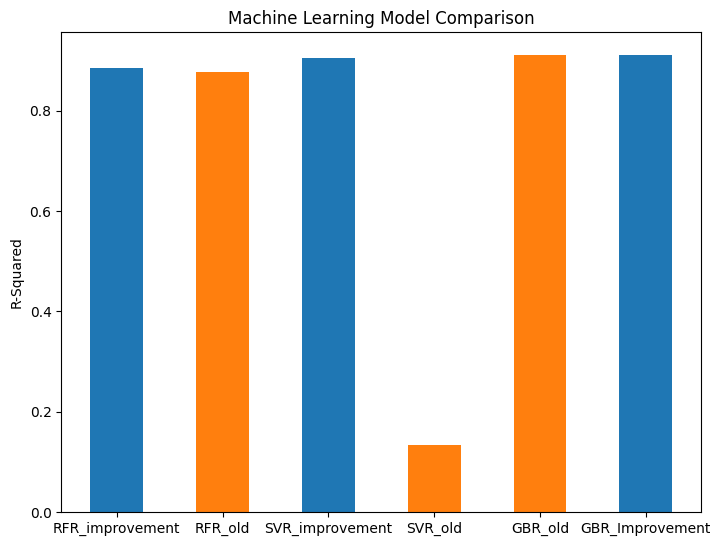

In [38]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
old = ["RFR_old","SVR_old","GBR_old"]
ax.bar(x = df_improvements.columns,height = df_improvements.transpose()["rse"],width = 0.5)
ax.bar(x = old,height = df_improvements[old].transpose()["rse"],width = 0.5)
ax.set_title('Machine Learning Model Comparison')
ax.set_ylabel('R-Squared')

__SHAP Plot Summary__

The Shapley value provides a principled way to explain the predictions of nonlinear models common in the field of machine learning. By interpreting a model trained on a set of features as a value function on a coalition of players, Shapley values provide a natural way to compute which features contribute to a prediction

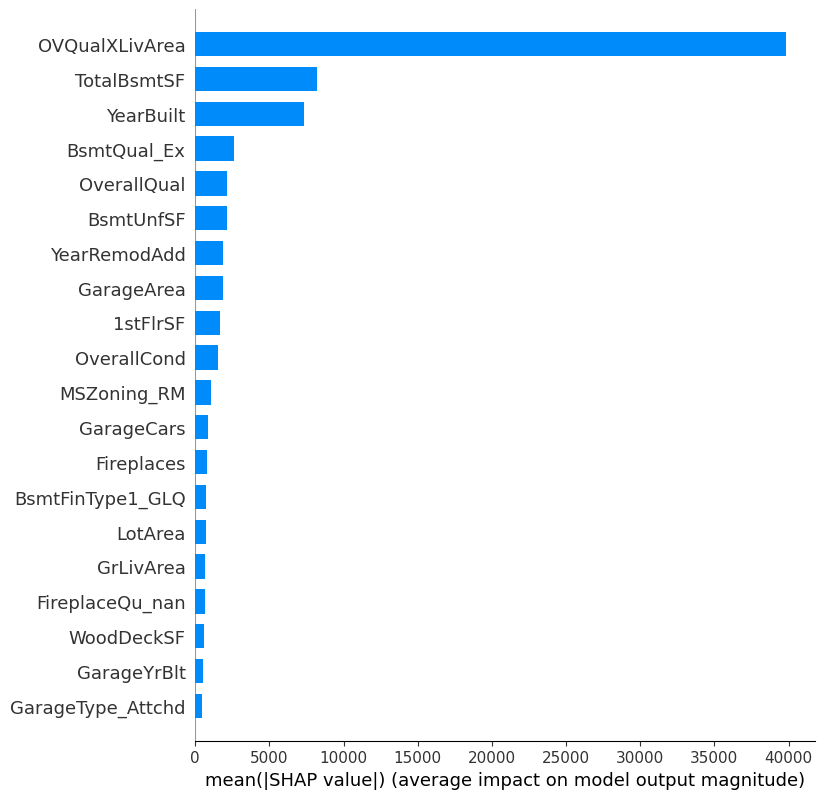

In [39]:
clf = RandomForestRegressor()
x = train_data.drop("SalePrice",axis=1)
y = train_data["SalePrice"]
clf.fit(x,y)
shap_values = shap.TreeExplainer(clf).shap_values(x)
shap.summary_plot(shap_values, x, plot_type="bar")

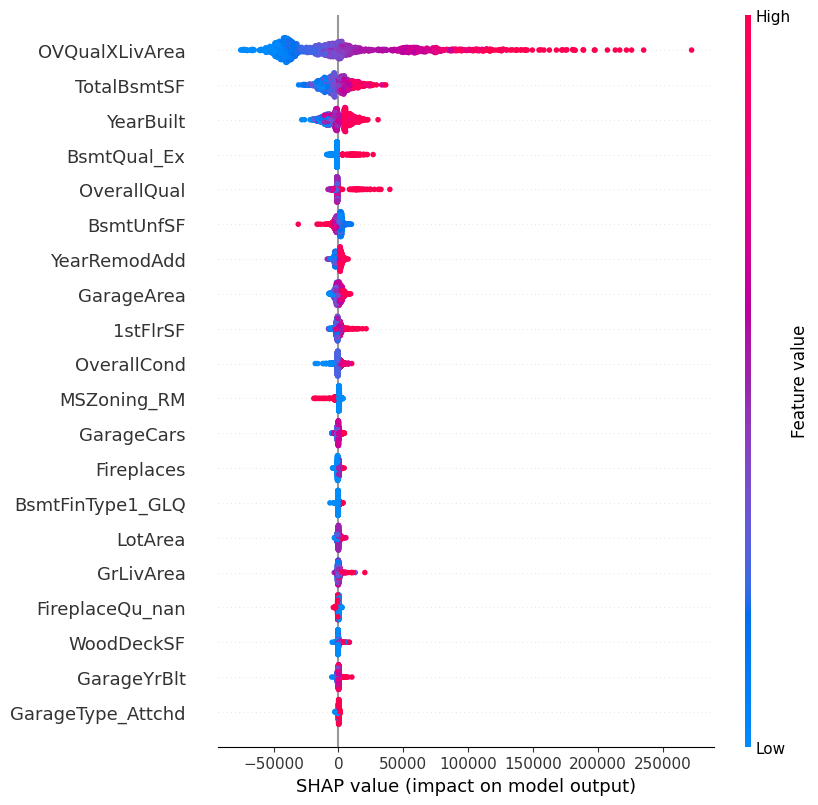

In [40]:
shap.summary_plot(shap_values, x)